In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import json

import re
import numpy as np
import pandas as pd
from pprint import pprint
import pickle
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Phrases
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.word2vec import LineSentence
from gensim.models.ldamulticore import LdaMulticore
# spacy for lemmatization
import spacy
# NLTK for text cleaning
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords, names
from nltk.tokenize import RegexpTokenizer
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# TextBlob package for translation and spelling correction
from textblob import TextBlob

nlp = spacy.load('en')
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
# %matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/home/argha/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/argha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


demo_data = pd.read_json('demo_data.json',orient='columns', encoding='utf-8')
demo_data.sample()

def review_to_sentence(df, sentiment):
    all_sentences = []
    from nltk.tokenize import sent_tokenize
    import pandas as pd
    allreview = df
    for areview in allreview:
        all_sentences.extend(sent_tokenize(areview))
    tokensentence = pd.DataFrame(data=all_sentences,columns=['TokenSentence'])
    tokensentence['Sentiment_Value']=sentiment
    return tokensentence

def sentence_sentiment(text):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    compound_sentiment = analyzer.polarity_scores(text)['compound']
    return compound_sentiment

def token_to_sentiment(df):
    df['CompoundSentiment'] = df['TokenSentence'].apply(sentence_sentiment)
    return df

# sentiment_sentence=[]
# sentiment_score=[]

tokensentence1 = review_to_sentence(demo_data['PositiveReview'],1)
sentencesentiment1 = token_to_sentiment(tokensentence1)
sentencesentiment1.head()

tokensentence2 = review_to_sentence(demo_data['NegativeReview'],-1)
sentencesentiment2 = token_to_sentiment(tokensentence2)
sentencesentiment2.head()

truthdf = pd.concat([sentencesentiment1,sentencesentiment2], ignore_index=True)

truthdf.head()

# truthdf.to_json('./truthdf.json')

N = truthdf.shape[0]
TP = truthdf.loc[(truthdf['Sentiment_Value']==1) & (truthdf['CompoundSentiment']>0)].shape[0]
TN = truthdf.ix[(truthdf['Sentiment_Value']==-1) & (truthdf['CompoundSentiment']<=0)].shape[0]
FP = truthdf.ix[(truthdf['Sentiment_Value']==-1) & (truthdf['CompoundSentiment']>0)].shape[0]
FN = truthdf.ix[(truthdf['Sentiment_Value']==1) & (truthdf['CompoundSentiment']<=0)].shape[0]

print(TP,TN,FP,FN)

truthdf.shape[0]

TP+TN+FP+FN

import tmtoolkit

In [3]:
import matplotlib.pyplot as plt   # for plotting the results
plt.style.use('ggplot')

# for loading the data:
from tmtoolkit.utils import unpickle_file
# for model evaluation with the lda package:
from tmtoolkit.topicmod import tm_lda
# for constructing the evaluation plot:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

In [7]:
from gensim.corpora import Dictionary, MmCorpus
trigram_dictionary = Dictionary.load('./models2/trigram_dict_all.dict')
trigram_bow_corpus = MmCorpus('./models2/trigram_bow_corpus.nm')
trigram_text = LineSentence('./models2/trigram_sentences.txt')
# Document to matrix
# import numpy as np
# from scipy.sparse import csr_matrix
# rows=[]
# cols=[]
# data=[]
# for i in range(0,len(trigram_bow_corpus)):
#     line = trigram_bow_corpus[i]
#     for indx,freq in line:
#         rows.append(i)
#         cols.append(indx)
#         data.append(freq)
# dtm = csr_matrix((data,(rows,cols)), shape = (len(trigram_bow_corpus),len(trigram_dictionary)), dtype=int)

In [8]:
# const_params = dict(n_iter=1000)
# ks = list(range(5, 50, 5))# + list(range(50, 200, 50)) + list(range(200, 400, 100))
# varying_params = [dict(n_topics=k, alpha=1.0/k) for k in ks]

In [9]:
# eval_results = tm_lda.evaluate_topic_models(dtm,varying_params,const_params,n_max_processes=10)

In [10]:
coherScores = {}
from gensim.models import CoherenceModel
for numTopics in range(3,100):
    ldamodel = LdaMulticore(trigram_bow_corpus, num_topics = numTopics, id2word=trigram_dictionary, passes=1)

    #filename = 'model_cv_' + str(numTopics) + '.gensim'
    #ldamodel.save(filename)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=trigram_text, dictionary=trigram_dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('NumTopis:', numTopics, '-- Coherence Score:', coherence_lda)

    coherScores[numTopics] = coherence_lda

NumTopis: 3 -- Coherence Score: 0.12394709905314573
NumTopis: 4 -- Coherence Score: 0.1629895450955815
NumTopis: 5 -- Coherence Score: 0.19138226194705005
NumTopis: 6 -- Coherence Score: 0.20838539083547833
NumTopis: 7 -- Coherence Score: 0.22251905428828994
NumTopis: 8 -- Coherence Score: 0.24824857814761137
NumTopis: 9 -- Coherence Score: 0.27239148893023163
NumTopis: 10 -- Coherence Score: 0.25076295132542503
NumTopis: 11 -- Coherence Score: 0.27473962129676094
NumTopis: 12 -- Coherence Score: 0.27531266858455056
NumTopis: 13 -- Coherence Score: 0.28444964268441747
NumTopis: 14 -- Coherence Score: 0.26708506251750935
NumTopis: 15 -- Coherence Score: 0.27754115103746396
NumTopis: 16 -- Coherence Score: 0.315720137989901
NumTopis: 17 -- Coherence Score: 0.2802244140601607
NumTopis: 18 -- Coherence Score: 0.29782460027331165
NumTopis: 19 -- Coherence Score: 0.30615146859428377
NumTopis: 20 -- Coherence Score: 0.2876768631030215
NumTopis: 21 -- Coherence Score: 0.3022267408682512
NumTop

In [11]:
coherdf = pd.DataFrame.from_dict(coherScores, orient='index')

In [12]:
coherdf.head()

,0
3,0.123947
4,0.162990
5,0.191382
6,0.208385
7,0.222519


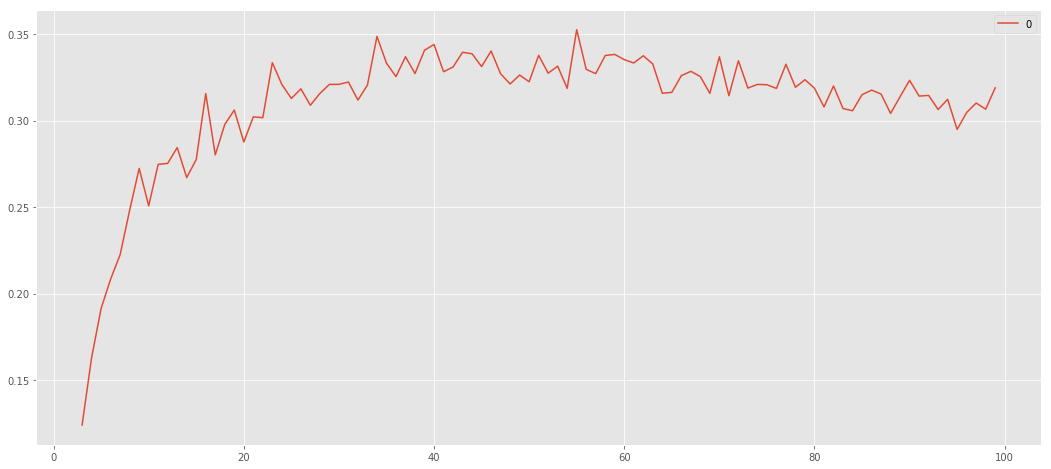

In [28]:
import seaborn as sns
# fig,ax = plt.subplots()
plt.figure(figsize=(18,8))
# palette = sns.color_palette("mako_r", 1)
fig=sns.lineplot(data=coherdf,size=40);
plt.savefig('fig1.png', dpi = 300)

In [29]:
coherdf.to_json('coherence_score.json')

In [39]:
from bokeh.plotting import figure, output_file, show

from bokeh.io import export_png



p = figure(plot_width=800, plot_height=400)
X = coherdf.index.values
Y = coherdf.ix[:,0]
# add a line renderer
p.line(X, Y, line_width=5)
export_png(p, filename="fig1.png")
show(p)